In [64]:
import pandas as pd
import streamlit as st

In [65]:
import numpy as np
import plotly.graph_objects as go

def gerar_grafico_radial_obesidade(df):
    # Cores por região
    cores_regiao = {
        'Norte': '#1f77b4',
        'Nordeste': '#ff7f0e',
        'Sudeste': '#2ca02c',
        'Sul': '#d62728',
        'Centro Oeste': '#9467bd',
        'estados': '#8c564b',
    }

    # Ordenar para manter coerência visual
    df = df.sort_values(by=['tabela', 'categoria'])

    # Ângulos para cada estado
    df['Angulo'] = np.linspace(0, 360, len(df), endpoint=False)
    
    fig = go.Figure()

    # Barras internas (obesidade)
    fig.add_trace(go.Barpolar(
        r=df['prev_obesidade'],
        theta=df['Angulo'],
        name='Obesidade',
        marker_color=[cores_regiao[r] for r in df['tabela']],
        marker_line_color="black",
        marker_line_width=0.5,
        opacity=1.0,
        hovertext=df['categoria'],
        hoverinfo='text+r',
    ))

    # Barras externas (excesso de peso)
    fig.add_trace(go.Barpolar(
        r=df['prev_excesso'],
        theta=df['Angulo'],
        name='Excesso de Peso',
        marker_color=[cores_regiao[r] for r in df['tabela']],
        marker_line_color="black",
        marker_line_width=0.5,
        opacity=0.4,  # Mais claro
        hovertext=df['categoria'],
        hoverinfo='text+r',
    ))

    fig.update_layout(
        title='Obesidade e Excesso de Peso por Estado e Região',
        template='plotly_white',
        polar=dict(
            radialaxis=dict(showticklabels=True, ticks=''),
            angularaxis=dict(
                tickmode='array',
                tickvals=df['Angulo'],
                ticktext=df['categoria']
            )
        ),
        legend=dict(orientation='h', yanchor='bottom', y=-0.2)
    )

    st.plotly_chart(fig, use_container_width=True)


In [19]:
#Lendo os arquivos CSV
df_gerais_sexo = pd.read_csv(r'C:\Users\200158\Documents\GitHub\Pessoal\Mestrado\UFMG\streamlit\dados\originais\dados_gerais_sexo_region_cadunico.csv')       
df_categorias_sexo = pd.read_csv(r'C:\Users\200158\Documents\GitHub\Pessoal\Mestrado\UFMG\streamlit\dados\originais\dados_categorias_sexo_region_cadunico.csv')       

df_categorias_prevalencia = pd.read_csv(r'C:\Users\200158\Documents\GitHub\Pessoal\Mestrado\UFMG\streamlit\dados\originais\dados_categorias_sexo_region_cadunico_prev.csv')       
df_geral_prevalencia = pd.read_csv(r'C:\Users\200158\Documents\GitHub\Pessoal\Mestrado\UFMG\streamlit\dados\originais\dados_gerais_sexo_region_cadunico_prev.csv')       


In [31]:
df_categorias_prevalencia.query('tabela == "estados"')

,tabela,categoria,idade_cat,sexo,region_cadunico,prev_excesso,erro_excesso,prev_obesidade,erro_obesidade
288,estados,Acre,0 - 5m,Feminino,Rural,14.29,3.53,6.12,2.42
289,estados,Acre,0 - 5m,Feminino,Urbana,20.28,2.73,7.83,1.82
290,estados,Alagoas,0 - 5m,Feminino,Rural,19.47,1.35,8.23,0.94
291,estados,Alagoas,0 - 5m,Feminino,Urbana,16.30,1.12,6.63,0.75
292,estados,Amapa,0 - 5m,Feminino,Rural,20.00,17.89,20.00,17.89
...,...,...,...,...,...,...,...,...,...
1579,estados,Sao Paulo,9a,Masculino,Urbana,36.59,0.56,19.52,0.46
1580,estados,Sergipe,9a,Masculino,Rural,22.77,2.03,9.15,1.40
1581,estados,Sergipe,9a,Masculino,Urbana,27.43,2.23,11.72,1.61
1582,estados,Tocantins,9a,Masculino,Rural,20.16,2.05,7.33,1.33


In [67]:
df = df_categorias_prevalencia.query('tabela == "estados" '
                                        'and idade_cat == "5a"' \
                                        'and sexo=="Feminino" ' \
                                        'and region_cadunico=="Urbana"').copy()

In [60]:
df

,tabela,categoria,idade_cat,sexo,region_cadunico,prev_excesso,erro_excesso,prev_obesidade,erro_obesidade
1044,estados,Acre,5a,Feminino,Rural,17.26,0.60,5.34,0.36
1045,estados,Acre,5a,Feminino,Urbana,18.07,0.52,6.19,0.32
1046,estados,Alagoas,5a,Feminino,Rural,22.05,0.34,8.08,0.22
1047,estados,Alagoas,5a,Feminino,Urbana,23.61,0.27,9.64,0.19
1048,estados,Amapa,5a,Feminino,Rural,14.37,1.02,4.08,0.58
1049,estados,Amapa,5a,Feminino,Urbana,15.92,0.54,4.52,0.31
1050,estados,Amazonas,5a,Feminino,Rural,14.64,0.31,4.50,0.18
1051,estados,Amazonas,5a,Feminino,Urbana,17.11,0.20,5.92,0.12
1052,estados,Bahia,5a,Feminino,Rural,16.44,0.14,5.53,0.09
1053,estados,Bahia,5a,Feminino,Urbana,20.05,0.13,7.53,0.08


In [ ]:
df

In [66]:
gerar_grafico_radial_obesidade(df)

2025-05-04 15:06:19.350 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 15:06:19.351 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 15:06:19.351 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 15:06:19.630 
  command:

    streamlit run c:\Users\200158\Documents\GitHub\Pessoal\Mestrado\UFMG\streamlit\venv_ufmg\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-04 15:06:19.630 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
df_gerais_sexo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tabela           153 non-null    object 
 1   categoria        153 non-null    object 
 2   med_altura       153 non-null    float64
 3   med_peso         153 non-null    float64
 4   med_imc          153 non-null    float64
 5   n_dist           153 non-null    int64  
 6   sexo             148 non-null    object 
 7   region_cadunico  152 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 9.7+ KB


In [25]:
df_categorias_sexo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tabela           1824 non-null   object 
 1   categoria        1824 non-null   object 
 2   idade_cat        1824 non-null   object 
 3   sexo             1824 non-null   object 
 4   region_cadunico  1824 non-null   object 
 5   med_altura       1824 non-null   float64
 6   med_peso         1824 non-null   float64
 7   med_imc          1824 non-null   float64
 8   n_dist           1824 non-null   int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 128.4+ KB


In [6]:
df_geral_raca =  df_categorias_sexo.query("tabela == 'raca'")

In [ ]:
df_geral_raca

array(['Amarela', 'Branca', 'Indígena', 'Parda', 'Preta'], dtype=object)

In [6]:
df_categorias_sexo.tabela.unique()

array(['geral', 'regiao', 'estados', 'raca'], dtype=object)

In [11]:
df_categ_geral =  df_categorias_sexo.query("tabela == 'geral'")
df_categ_regiao =  df_categorias_sexo.query("tabela == 'regiao'")
df_categ_estados =  df_categorias_sexo.query("tabela == 'estados'")
df_categ_raca =  df_categorias_sexo.query("tabela == 'raca'")

In [16]:
#df_categ_raca.query("sexo == 'Feminino' and region_cadunico == 'Urbana'")

df_teste = df_categ_raca.query("sexo == 'Feminino' and region_cadunico == 'Urbana'").sort_values(by=['categoria','med_altura', 'med_imc'], ascending=[True,True,True])

In [17]:
df_teste

,tabela,categoria,idade_cat,sexo,region_cadunico,med_altura,med_peso,med_imc,n_dist
1585,raca,Amarela,0 - 5m,Feminino,Urbana,-0.67,-0.17,0.29,182
1625,raca,Amarela,12 - 17m,Feminino,Urbana,-0.37,0.35,0.80,910
1605,raca,Amarela,06 - 11m,Feminino,Urbana,-0.36,0.23,0.61,536
1645,raca,Amarela,18 - 23m,Feminino,Urbana,-0.31,0.24,0.62,1165
1665,raca,Amarela,2a,Feminino,Urbana,-0.22,0.15,0.39,2192
1705,raca,Amarela,4a,Feminino,Urbana,-0.20,-0.06,0.10,2461
1725,raca,Amarela,5a,Feminino,Urbana,-0.18,-0.07,0.05,2404
1685,raca,Amarela,3a,Feminino,Urbana,-0.14,0.07,0.24,2491
1745,raca,Amarela,6a,Feminino,Urbana,-0.09,0.00,0.04,1993
1805,raca,Amarela,9a,Feminino,Urbana,-0.02,0.18,0.23,578


In [8]:
df_categ_estados

,tabela,categoria,idade_cat,sexo,med_altura,med_peso,med_imc,n_dist
144,estados,Acre,0 - 5m,Feminino,-0.47,0.04,0.44,315
145,estados,Alagoas,0 - 5m,Feminino,-0.44,0.10,0.51,1949
146,estados,Amapa,0 - 5m,Feminino,0.05,0.14,0.17,54
147,estados,Amazonas,0 - 5m,Feminino,-0.25,0.17,0.45,963
148,estados,Bahia,0 - 5m,Feminino,-0.11,0.05,0.17,8043
...,...,...,...,...,...,...,...,...
787,estados,Roraima,9a,Masculino,-0.30,0.11,0.32,118
788,estados,Santa Catarina,9a,Masculino,0.04,0.43,0.55,3206
789,estados,Sao Paulo,9a,Masculino,0.20,0.56,0.58,8319
790,estados,Sergipe,9a,Masculino,0.08,0.13,0.05,827


In [29]:
df_categ_estados

,tabela,categoria,idade_cat,sexo,med_altura,med_peso,med_imc,n_dist
144,estados,Acre,0 - 5m,Feminino,-0.47,0.04,0.44,315
145,estados,Alagoas,0 - 5m,Feminino,-0.44,0.10,0.51,1949
146,estados,Amapa,0 - 5m,Feminino,0.05,0.14,0.17,54
147,estados,Amazonas,0 - 5m,Feminino,-0.25,0.17,0.45,963
148,estados,Bahia,0 - 5m,Feminino,-0.11,0.05,0.17,8043
...,...,...,...,...,...,...,...,...
787,estados,Roraima,9a,Masculino,-0.30,0.11,0.32,118
788,estados,Santa Catarina,9a,Masculino,0.04,0.43,0.55,3206
789,estados,Sao Paulo,9a,Masculino,0.20,0.56,0.58,8319
790,estados,Sergipe,9a,Masculino,0.08,0.13,0.05,827


In [16]:
import matplotlib.pyplot as plt

In [17]:
# Filtrar os dados para a tabela 'geral'
df_geral = df_categorias_sexo[df_categorias_sexo['tabela'] == 'geral']


In [24]:
df_geral_sex

,tabela,categoria,idade_cat,sexo,med_altura,med_peso,med_imc,n_dist
0,geral,qt_criancas,0 - 5m,Feminino,-0.58,-0.22,0.16,111604
1,geral,qt_criancas,0 - 5m,Masculino,-0.73,-0.27,0.19,114538
2,geral,qt_criancas,06 - 11m,Feminino,-0.32,0.26,0.62,336032
3,geral,qt_criancas,06 - 11m,Masculino,-0.50,0.19,0.65,331206
4,geral,qt_criancas,12 - 17m,Feminino,-0.43,0.30,0.78,536718
5,geral,qt_criancas,12 - 17m,Masculino,-0.63,0.19,0.78,525085
6,geral,qt_criancas,18 - 23m,Feminino,-0.43,0.24,0.71,701992
7,geral,qt_criancas,18 - 23m,Masculino,-0.59,0.14,0.71,686426
8,geral,qt_criancas,2a,Feminino,-0.26,0.12,0.39,1336485
9,geral,qt_criancas,2a,Masculino,-0.36,0.08,0.42,1312496


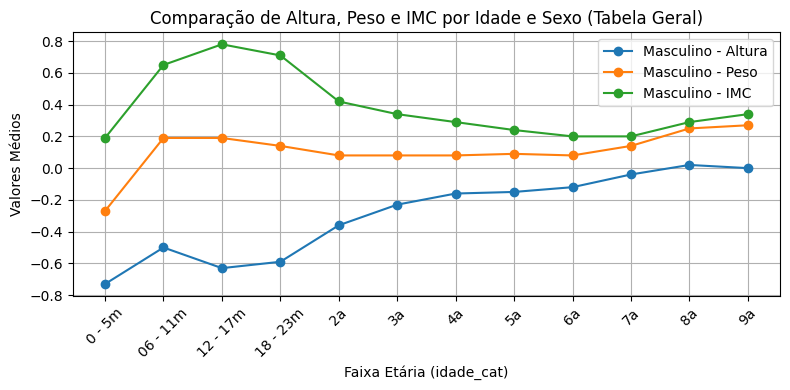

In [20]:
# Criar o gráfico
fig, ax = plt.subplots(figsize=(8, 4))

# Plotar os dados para cada sexo
for sexo in ['Masculino']:
    df_sexo = df_geral[df_geral['sexo'] == sexo]
    ax.plot(df_sexo['idade_cat'], df_sexo['med_altura'], label=f'{sexo} - Altura', marker='o')
    ax.plot(df_sexo['idade_cat'], df_sexo['med_peso'], label=f'{sexo} - Peso', marker='o')
    ax.plot(df_sexo['idade_cat'], df_sexo['med_imc'], label=f'{sexo} - IMC', marker='o')

# Configurar o gráfico
ax.set_title('Comparação de Altura, Peso e IMC por Idade e Sexo (Tabela Geral)')
ax.set_xlabel('Faixa Etária (idade_cat)')
ax.set_ylabel('Valores Médios')
ax.legend()
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico

In [ ]:
# Criar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Plotar os dados para cada sexo
for sexo in ['Feminino', 'Masculino']:
    df_sexo = df_geral[df_geral['sexo'] == sexo]
    ax.plot(df_sexo['idade_cat'], df_sexo['med_altura'], label=f'{sexo} - Altura', marker='o')
    ax.plot(df_sexo['idade_cat'], df_sexo['med_peso'], label=f'{sexo} - Peso', marker='o')
    ax.plot(df_sexo['idade_cat'], df_sexo['med_imc'], label=f'{sexo} - IMC', marker='o')

# Configurar o gráfico
ax.set_title('Comparação de Altura, Peso e IMC por Idade e Sexo (Tabela Geral)')
ax.set_xlabel('Faixa Etária (idade_cat)')
ax.set_ylabel('Valores Médios')
ax.legend()
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()

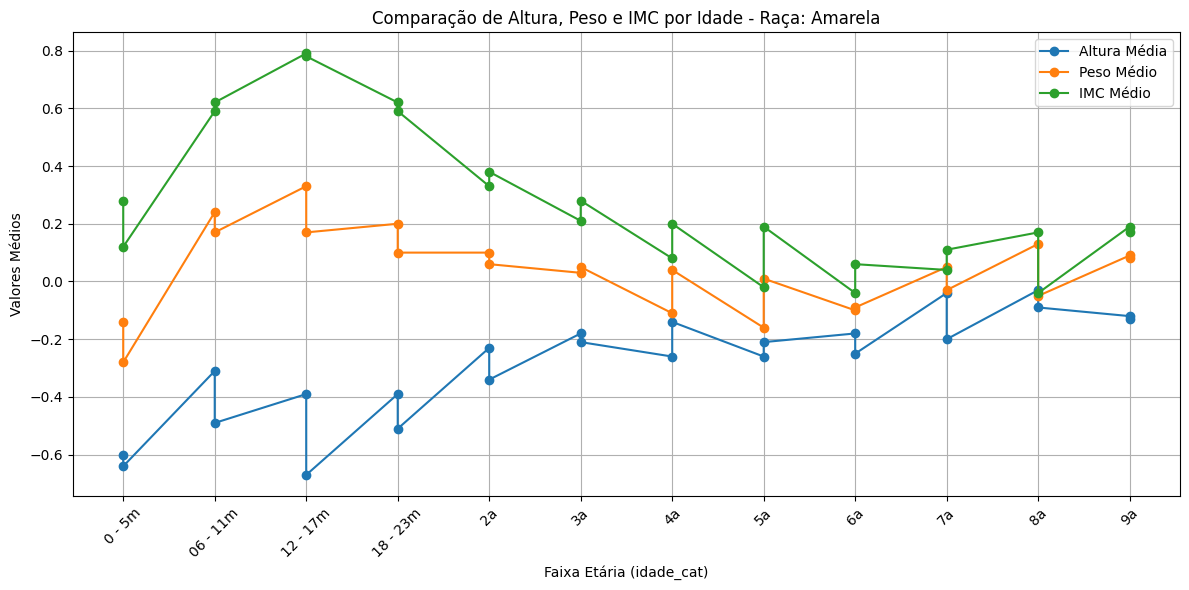

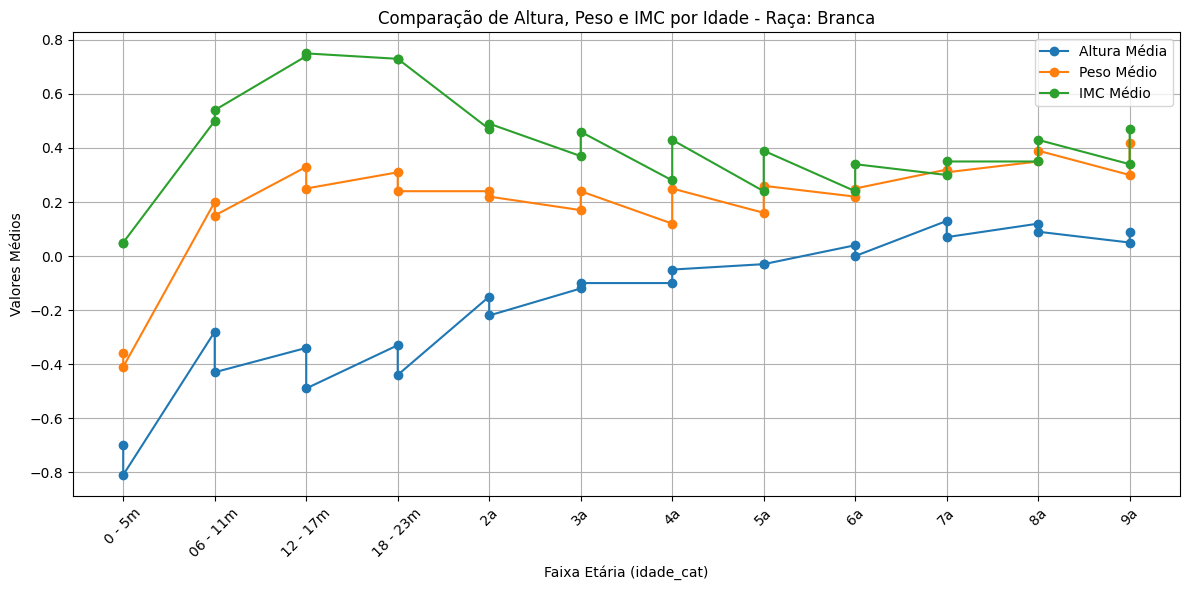

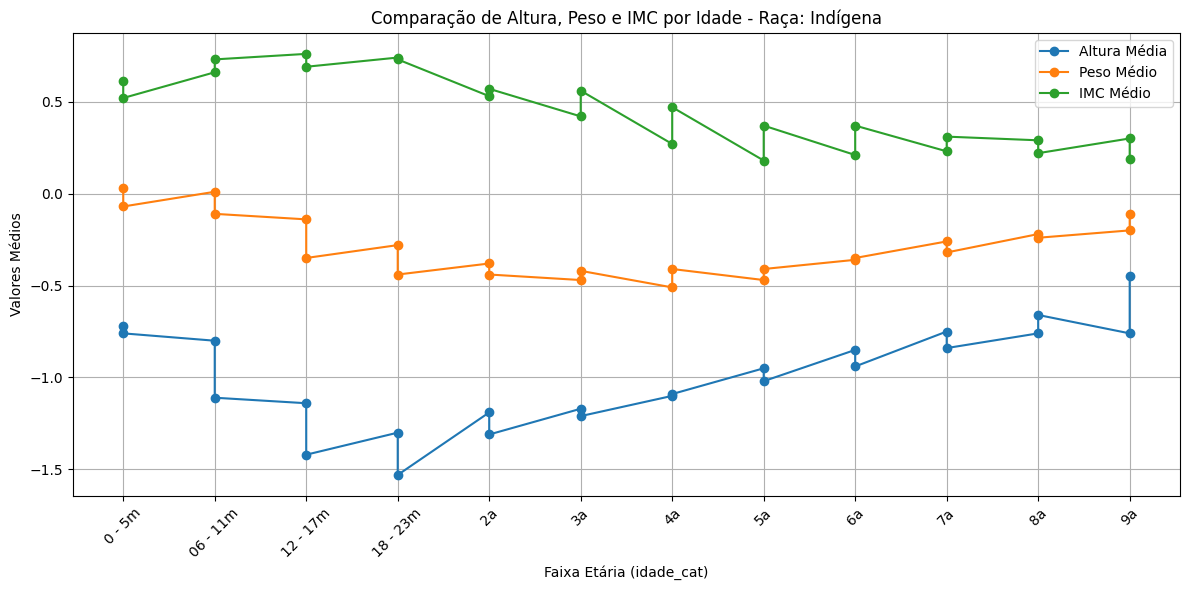

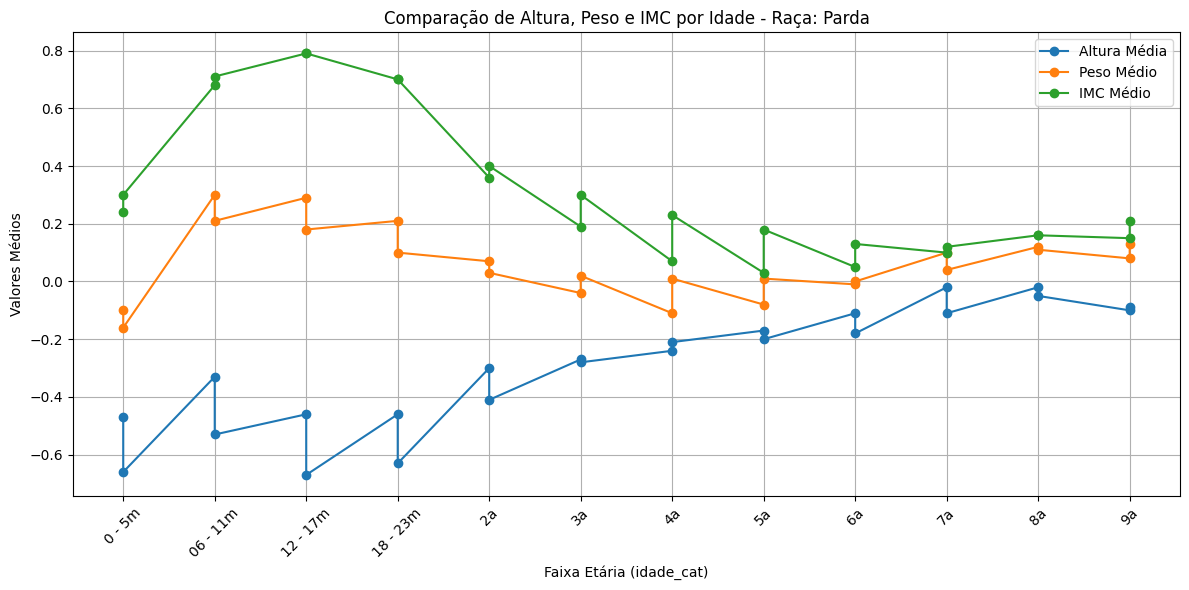

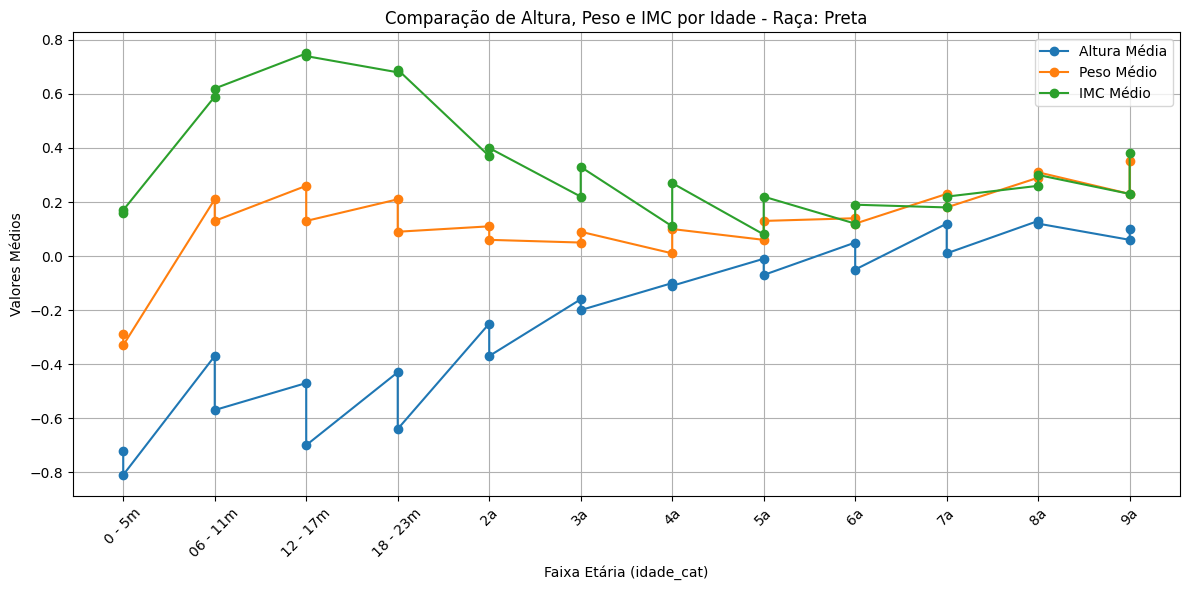

In [33]:
# Criar gráficos para cada raça
for raca in df_categ_raca['categoria'].unique():
    # Filtrar os dados para a raça atual
    df_raca = df_categ_raca[df_categ_raca['categoria'] == raca]
    
    # Criar o gráfico
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plotar os dados
    ax.plot(df_raca['idade_cat'], df_raca['med_altura'], label='Altura Média', marker='o')
    ax.plot(df_raca['idade_cat'], df_raca['med_peso'], label='Peso Médio', marker='o')
    ax.plot(df_raca['idade_cat'], df_raca['med_imc'], label='IMC Médio', marker='o')
    
    # Configurar o gráfico
    ax.set_title(f'Comparação de Altura, Peso e IMC por Idade - Raça: {raca}')
    ax.set_xlabel('Faixa Etária (idade_cat)')
    ax.set_ylabel('Valores Médios')
    ax.legend()
    ax.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Exibir o gráfico
    plt.show()

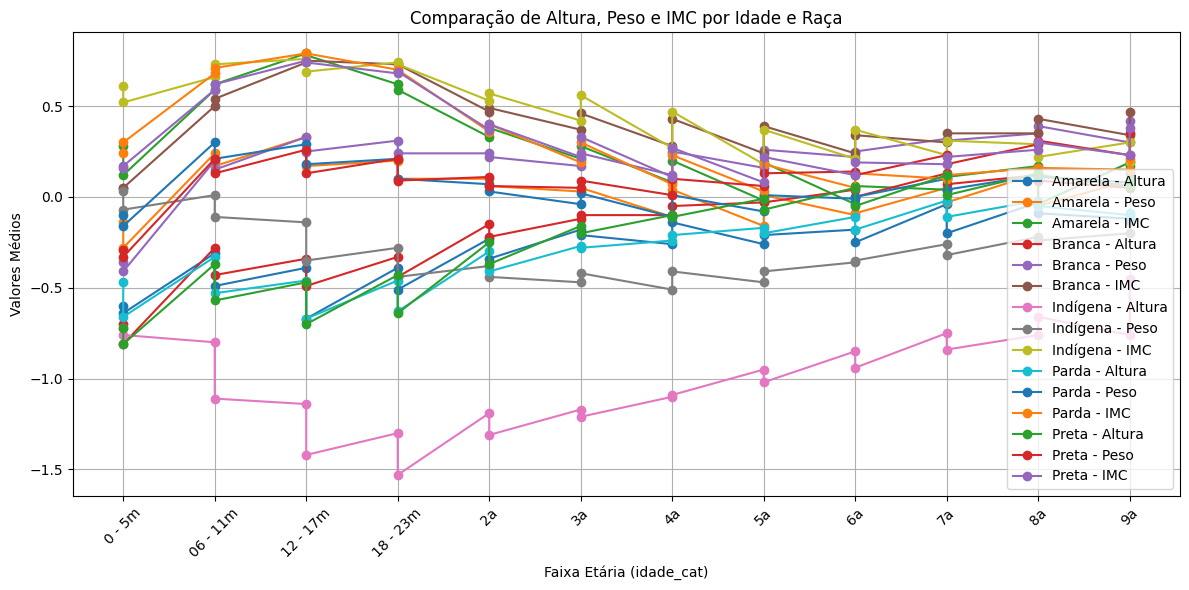

In [32]:
# Criar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Plotar os dados para cada raça
for raca in df_categ_raca['categoria'].unique():
    df_raca = df_categ_raca[df_categ_raca['categoria'] == raca]
    ax.plot(df_raca['idade_cat'], df_raca['med_altura'], label=f'{raca} - Altura', marker='o')
    ax.plot(df_raca['idade_cat'], df_raca['med_peso'], label=f'{raca} - Peso', marker='o')
    ax.plot(df_raca['idade_cat'], df_raca['med_imc'], label=f'{raca} - IMC', marker='o')

# Configurar o gráfico
ax.set_title('Comparação de Altura, Peso e IMC por Idade e Raça')
ax.set_xlabel('Faixa Etária (idade_cat)')
ax.set_ylabel('Valores Médios')
ax.legend()
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [1]:
from pathlib import Path
import pandas as pd

caminho = Path("dados") / "originais" / "dados_categorias_sexo_region_cadunico.csv"

In [2]:
caminho = Path("dados") / "originais" / "dados_categorias_sexo_region_cadunico_prev.csv"
df_categorias_prevalencia = pd.read_csv(caminho,sep=',', decimal='.')       

df_categ_geral_prev =  df_categorias_prevalencia.query("tabela == 'geral'")
df_categ_regiao_prev =  df_categorias_prevalencia.query("tabela == 'regiao'")
df_categ_estados_prev =  df_categorias_prevalencia.query("tabela == 'estados'")
df_categ_raca_prev =  df_categorias_prevalencia.query("tabela == 'raca'")

In [3]:
df_categ_geral_prev

,tabela,categoria,idade_cat,sexo,region_cadunico,prev_excesso,erro_excesso,prev_obesidade,erro_obesidade
0,geral,geral,0 - 5m,Feminino,Rural,11.21,0.20,3.91,0.12
1,geral,geral,0 - 5m,Feminino,Urbana,8.14,0.09,2.47,0.05
2,geral,geral,0 - 5m,Masculino,Rural,13.29,0.21,4.62,0.13
3,geral,geral,0 - 5m,Masculino,Urbana,9.61,0.10,3.02,0.06
4,geral,geral,06 - 11m,Feminino,Rural,19.51,0.13,6.83,0.08
5,geral,geral,06 - 11m,Feminino,Urbana,15.87,0.07,5.21,0.05
6,geral,geral,06 - 11m,Masculino,Rural,21.54,0.13,7.84,0.09
7,geral,geral,06 - 11m,Masculino,Urbana,17.71,0.08,5.99,0.05
8,geral,geral,12 - 17m,Feminino,Rural,20.55,0.10,6.86,0.06
9,geral,geral,12 - 17m,Feminino,Urbana,18.18,0.06,5.69,0.04
